In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/combosciplex/logfoldchanges"

In [3]:
unique_vals <- c('TFPI2', 'PTPRJ', "KYNU", "KRT7")

In [4]:
data_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/analysis/combosciplex/embedding"

New names:
• `` -> `...1`
Rows: 38 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, mode
dbl (3): predictions, true, logfoldchanges_pred

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "TFPI2"


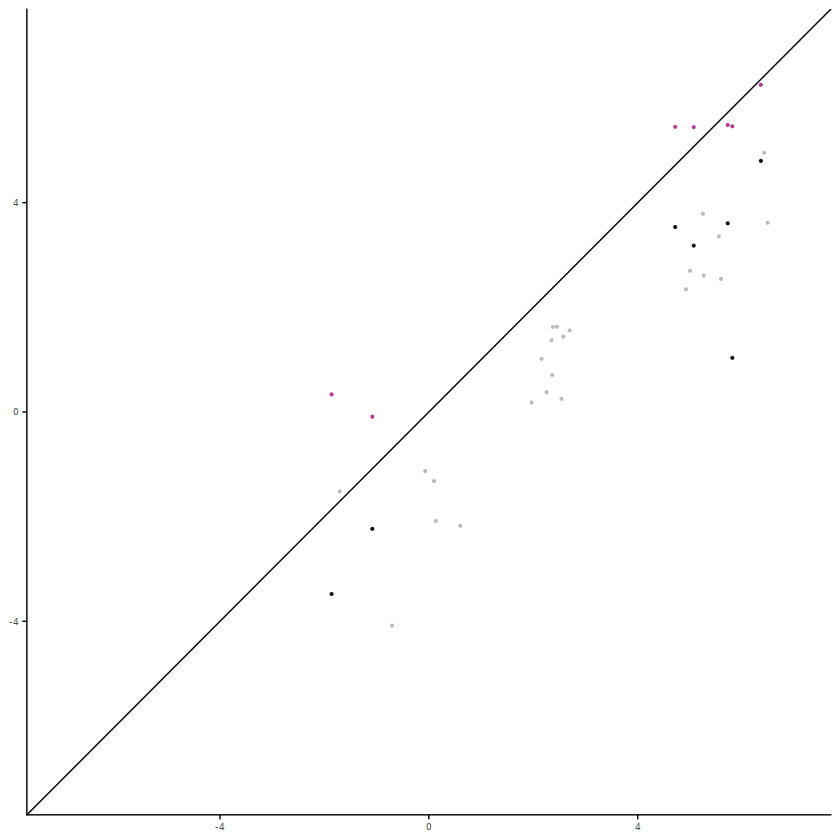

In [14]:
library(ggplot2)
library(readr)
library(glue)

el <- unique_vals[[1]]
df1 <- read_csv(file.path(data_dir, glue("{el}_logfold.csv")))

p <- ggplot(df1, aes(x = true, y = predictions, color = mode)) +
  scale_color_manual(values = c("train" = "#B7B7B7", "CF" = "#B12F8C", "test"="black")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = c(-7, 7), ylim = c(-7, 7)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("{el}_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)
print(el)


New names:
• `` -> `...1`
Rows: 38 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, mode
dbl (3): predictions, true, logfoldchanges_pred

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PTPRJ"


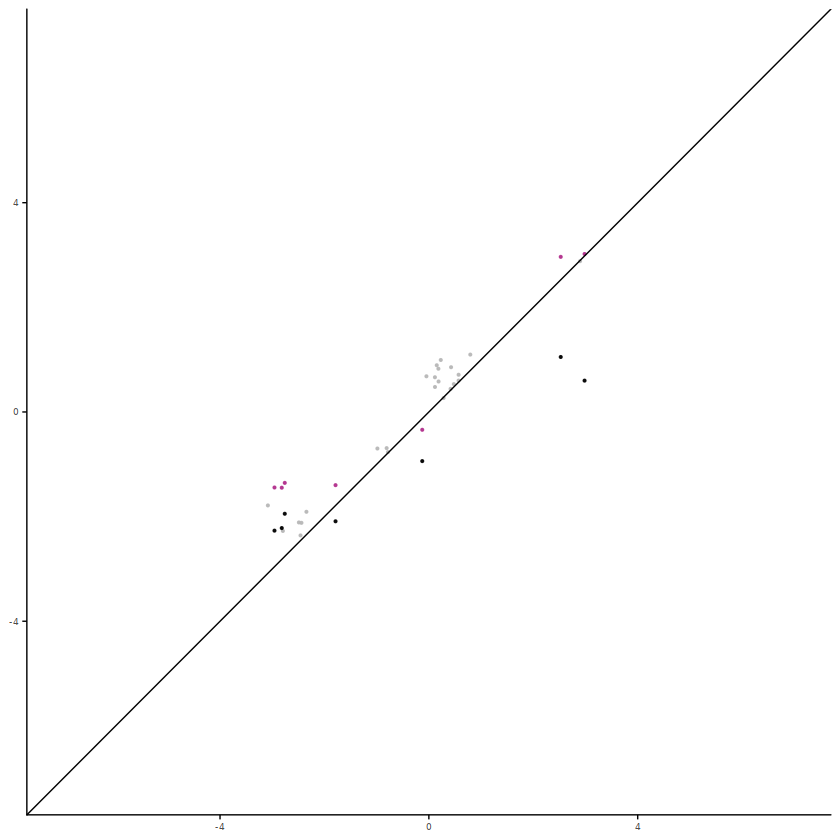

In [13]:
library(ggplot2)
library(readr)
library(glue)

el <- unique_vals[[2]]
df1 <- read_csv(file.path(data_dir, glue("{el}_logfold.csv")))

p <- ggplot(df1, aes(x = true, y = predictions, color = mode)) +
  scale_color_manual(values = c("train" = "#B7B7B7", "CF" = "#B12F8C", "test"="black")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = c(-7, 7), ylim = c(-7, 7)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("{el}_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)
print(el)


New names:
• `` -> `...1`
Rows: 38 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, mode
dbl (3): predictions, true, logfoldchanges_pred

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "KYNU"


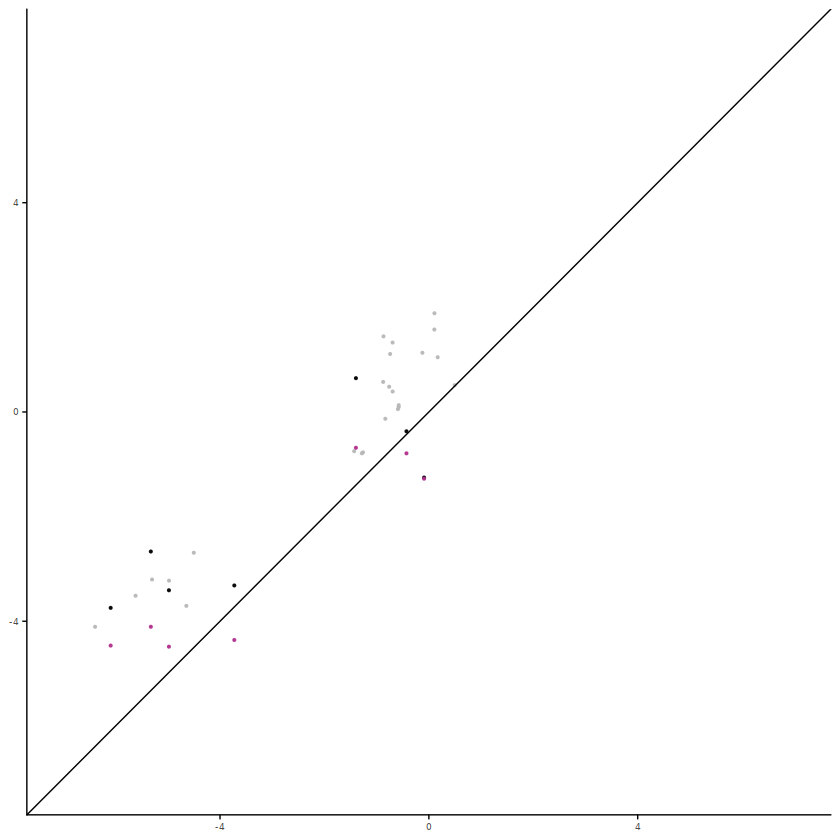

In [12]:
library(ggplot2)
library(readr)
library(glue)

el <- unique_vals[[3]]
df1 <- read_csv(file.path(data_dir, glue("{el}_logfold.csv")))

p <- ggplot(df1, aes(x = true, y = predictions, color = mode)) +
  scale_color_manual(values = c("train" = "#B7B7B7", "CF" = "#B12F8C", "test"="black")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = c(-7, 7), ylim = c(-7, 7)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("{el}_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)
print(el)


New names:
• `` -> `...1`
Rows: 38 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, mode
dbl (3): predictions, true, logfoldchanges_pred

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "KRT7"


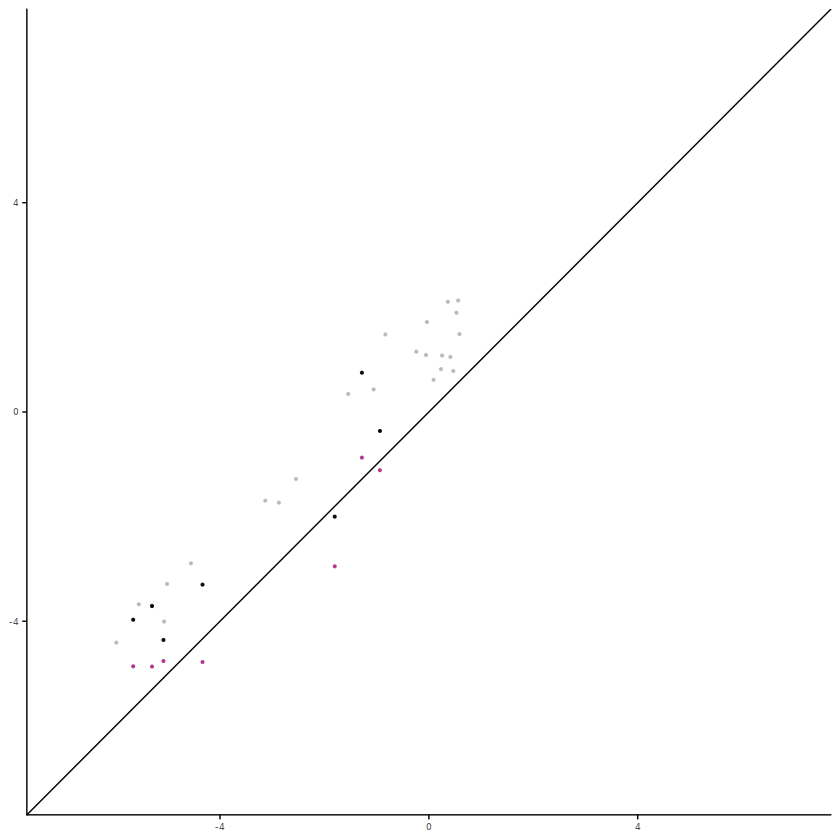

In [11]:
library(ggplot2)
library(readr)
library(glue)

el <- unique_vals[[4]]
df1 <- read_csv(file.path(data_dir, glue("{el}_logfold.csv")))

p <- ggplot(df1, aes(x = true, y = predictions, color = mode)) +
  scale_color_manual(values = c("train" = "#B7B7B7", "CF" = "#B12F8C", "test"="black")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = c(-7, 7), ylim = c(-7, 7)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("{el}_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)
print(el)
